### BA 4005 Task 7, Name : K.M.Hapuarachchi Index No : 19880081

#### Read all datasets to python

In [92]:
import pandas as pd

In [93]:
corr_df = pd.read_excel('Corruption.xlsx',engine='openpyxl')
corr_df.head()

,Year,Sri Lanka,Ø Asia,Ø worldwide
0,2021,63,59.3,56.8
1,2020,62,58.5,56.7
2,2019,62,59.2,56.8
3,2018,62,60.0,56.9
4,2017,62,60.0,56.9


In [94]:
gdp_df = pd.read_excel('gdp per capita.xlsx',engine='openpyxl')
gdp_df.head()

,Year,GDP per Capita
0,1960,142.779622
1,1961,142.838142
2,1962,138.536654
3,1963,117.071988
4,1964,120.714348


In [95]:
debt_df = pd.read_excel('debt gdp perc.xlsx',engine='openpyxl')
debt_df.head()

,Year,Treasury Bills (a),Treasury Bonds (b) (c ),Rupee Loans,Other,Total,Foreign Debt (a) (b),Total Debt,Domestic,Foreign,Total.1
0,2000-01-01,134996.0,204124.0,263888.0,73652.0,676660.0,542040.0,1218700.0,53.800000,43.100000,96.900000
1,2001-01-01,170995.0,229174.0,292813.0,122983.0,815965.0,636741.0,1452706.0,58.000000,45.300000,103.300000
2,2002-01-01,210995.0,347128.0,287701.0,102562.4,948386.4,721957.0,1670343.4,60.000000,45.600000,105.600000
3,2003-01-01,219295.0,487504.0,248414.0,69153.0,1024366.0,843882.0,1868248.0,56.207626,46.304352,102.511978
4,2004-01-01,243886.0,647746.0,164758.0,91396.0,1147786.0,996138.0,2143924.0,54.895901,47.642934,102.538835


In [96]:
debt_df.columns

Index(['Year', 'Treasury Bills (a)', 'Treasury Bonds (b) (c )', 'Rupee Loans',
       'Other', 'Total', 'Foreign Debt (a) (b)', 'Total Debt', 'Domestic',
       'Foreign', 'Total.1'],
      dtype='object')

In [97]:
debt_df['Year'] = pd.to_datetime(debt_df['Year'])
debt_df['Year'] = pd.DatetimeIndex(debt_df['Year']).year
debt_df.head()

,Year,Treasury Bills (a),Treasury Bonds (b) (c ),Rupee Loans,Other,Total,Foreign Debt (a) (b),Total Debt,Domestic,Foreign,Total.1
0,2000,134996.0,204124.0,263888.0,73652.0,676660.0,542040.0,1218700.0,53.800000,43.100000,96.900000
1,2001,170995.0,229174.0,292813.0,122983.0,815965.0,636741.0,1452706.0,58.000000,45.300000,103.300000
2,2002,210995.0,347128.0,287701.0,102562.4,948386.4,721957.0,1670343.4,60.000000,45.600000,105.600000
3,2003,219295.0,487504.0,248414.0,69153.0,1024366.0,843882.0,1868248.0,56.207626,46.304352,102.511978
4,2004,243886.0,647746.0,164758.0,91396.0,1147786.0,996138.0,2143924.0,54.895901,47.642934,102.538835


In [98]:
debt_df=debt_df.drop(columns =['Treasury Bills (a)', 'Treasury Bonds (b) (c )', 'Rupee Loans',
       'Other', 'Total', 'Foreign Debt (a) (b)', 'Total Debt', 'Domestic',
       'Foreign'])

In [99]:
debt_df.head()

,Year,Total.1
0,2000,96.900000
1,2001,103.300000
2,2002,105.600000
3,2003,102.511978
4,2004,102.538835


In [100]:
debt_df.columns = ['Year','Debt to GDP']

In [101]:
debt_df.head()

,Year,Debt to GDP
0,2000,96.900000
1,2001,103.300000
2,2002,105.600000
3,2003,102.511978
4,2004,102.538835


In [54]:
debt_df.dtypes

Year             int64
Debt to GDP    float64
dtype: object

#### final df

In [55]:
final_df=gdp_df.merge(debt_df,how='left',left_on='Year',right_on='Year')
final_df.head()

,Year,GDP per Capita,Debt to GDP
0,1960,142.779622,NaN
1,1961,142.838142,NaN
2,1962,138.536654,NaN
3,1963,117.071988,NaN
4,1964,120.714348,NaN


In [56]:
final_df=final_df.merge(corr_df,how='left',left_on='Year',right_on='Year')
final_df.head()

,Year,GDP per Capita,Debt to GDP,Sri Lanka,Ø Asia,Ø worldwide
0,1960,142.779622,NaN,NaN,NaN,NaN
1,1961,142.838142,NaN,NaN,NaN,NaN
2,1962,138.536654,NaN,NaN,NaN,NaN
3,1963,117.071988,NaN,NaN,NaN,NaN
4,1964,120.714348,NaN,NaN,NaN,NaN


In [57]:
final_df.columns

Index(['Year', 'GDP per Capita', 'Debt to GDP', 'Sri Lanka', 'Ø Asia',
       'Ø worldwide'],
      dtype='object')

In [58]:
final_df=final_df.drop(columns=['Ø Asia',
       'Ø worldwide'])

In [59]:
final_df=final_df.rename(columns={'Sri Lanka':'Corruption Ind'})
final_df.head()

,Year,GDP per Capita,Debt to GDP,Corruption Ind
0,1960,142.779622,NaN,NaN
1,1961,142.838142,NaN,NaN
2,1962,138.536654,NaN,NaN
3,1963,117.071988,NaN,NaN
4,1964,120.714348,NaN,NaN


#### Filter Records After 2000

In [60]:
final_df=final_df[final_df['Year']>=2000]
final_df=final_df[final_df['Year']<2022]

In [61]:
final_df.head()

,Year,GDP per Capita,Debt to GDP,Corruption Ind
40,2000,869.696285,96.900000,NaN
41,2001,832.803572,103.300000,NaN
42,2002,867.491487,105.600000,NaN
43,2003,982.195697,102.511978,66.0
44,2004,1065.784437,102.538835,65.0


#### Check for Null Records

In [62]:
final_df.isna().sum()

Year              0
GDP per Capita    0
Debt to GDP       0
Corruption Ind    3
dtype: int64

Get records with null corruption index

In [63]:
final_df[final_df['Corruption Ind'].isna()]

,Year,GDP per Capita,Debt to GDP,Corruption Ind
40,2000,869.696285,96.9,NaN
41,2001,832.803572,103.3,NaN
42,2002,867.491487,105.6,NaN


In [64]:
final_df[final_df['Debt to GDP'].isna()]

,Year,GDP per Capita,Debt to GDP,Corruption Ind


fill missing corruption index values with first available observation

In [65]:
final_df['Corruption Ind']=final_df['Corruption Ind'].fillna(66)
final_df['Corruption Ind']=100-final_df['Corruption Ind']
final_df.head()

,Year,GDP per Capita,Debt to GDP,Corruption Ind
40,2000,869.696285,96.900000,34.0
41,2001,832.803572,103.300000,34.0
42,2002,867.491487,105.600000,34.0
43,2003,982.195697,102.511978,34.0
44,2004,1065.784437,102.538835,35.0


In [66]:
final_df.head()

,Year,GDP per Capita,Debt to GDP,Corruption Ind
40,2000,869.696285,96.900000,34.0
41,2001,832.803572,103.300000,34.0
42,2002,867.491487,105.600000,34.0
43,2003,982.195697,102.511978,34.0
44,2004,1065.784437,102.538835,35.0


### EDA

Plot GDP per capita

Text(0.5, 1.0, 'Time series of GDP per Capita')

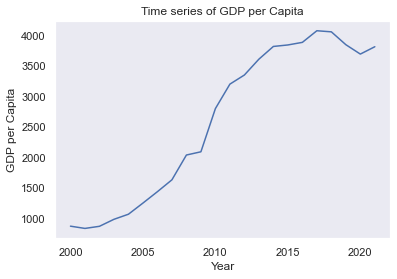

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="dark")

p1=sns.lineplot(x='Year', y="GDP per Capita",
             data=final_df
            
            )
p1.set(xlabel='Year', ylabel='GDP per Capita')
p1.set_title('Time series of GDP per Capita')


Plot corruption index

Text(0.5, 1.0, 'Time series of Corruption Ind')

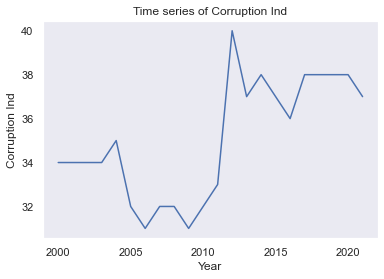

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="dark")

p1=sns.lineplot(x='Year', y="Corruption Ind",
             data=final_df
            
            )
p1.set(xlabel='Year', ylabel='Corruption Ind')
p1.set_title('Time series of Corruption Ind')


Plot debt to GDP percentage

Text(0.5, 1.0, 'Time series of Debt to GDP')

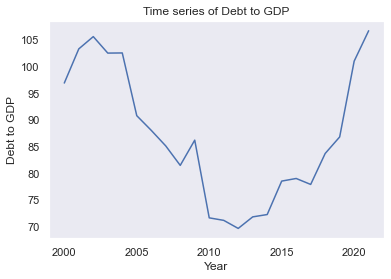

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="dark")

p1=sns.lineplot(x='Year', y="Debt to GDP",
             data=final_df
            
            )
p1.set(xlabel='Year', ylabel='Debt to GDP')
p1.set_title('Time series of Debt to GDP')

In [70]:
final_df[(final_df['Year']>=2003) & (final_df['Year']<2022)]

,Year,GDP per Capita,Debt to GDP,Corruption Ind
43,2003,982.195697,102.511978,34.0
44,2004,1065.784437,102.538835,35.0
45,2005,1248.698185,90.784179,32.0
46,2006,1435.816813,88.034253,31.0
47,2007,1630.388906,85.117283,32.0
...,...,...,...,...
57,2017,4077.043841,77.900000,38.0
58,2018,4059.208230,83.700000,38.0
59,2019,3848.212376,86.800000,38.0
60,2020,3694.040948,101.000000,38.0


#### Test Granger Causality

In [71]:
df2 = final_df[(final_df['Year']>=2003) & (final_df['Year']<2022)]
from statsmodels.tsa.stattools import grangercausalitytests
grangercausalitytests(df2[['Corruption Ind','GDP per Capita']], maxlag=[1])


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=8.8364  , p=0.0095  , df_denom=15, df_num=1
ssr based chi2 test:   chi2=10.6037 , p=0.0011  , df=1
likelihood ratio test: chi2=8.3370  , p=0.0039  , df=1
parameter F test:         F=8.8364  , p=0.0095  , df_denom=15, df_num=1


{1: ({'ssr_ftest': (8.836429970982504, 0.0094870481390128, 15.0, 1),
   'ssr_chi2test': (10.603715965179006, 0.0011286060740207553, 1),
   'lrtest': (8.336967846156597, 0.0038846377484535993, 1),
   'params_ftest': (8.83642997098104, 0.00948704813901755, 15.0, 1.0)},
   array([[0., 1., 0.]])])}

In [72]:
df2 = final_df[(final_df['Year']>=2003) & (final_df['Year']<2022)]
from statsmodels.tsa.stattools import grangercausalitytests
grangercausalitytests(df2[['Corruption Ind','Debt to GDP']], maxlag=[1])


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.6430  , p=0.1248  , df_denom=15, df_num=1
ssr based chi2 test:   chi2=3.1716  , p=0.0749  , df=1
likelihood ratio test: chi2=2.9212  , p=0.0874  , df=1
parameter F test:         F=2.6430  , p=0.1248  , df_denom=15, df_num=1


{1: ({'ssr_ftest': (2.6429946285265546, 0.12482790634233486, 15.0, 1),
   'ssr_chi2test': (3.171593554231866, 0.07492930498387802, 1),
   'lrtest': (2.921194774622748, 0.08742311084323588, 1),
   'params_ftest': (2.6429946285265387, 0.12482790634233594, 15.0, 1.0)},
   array([[0., 1., 0.]])])}

In [73]:
df2 = final_df[(final_df['Year']>=2003) & (final_df['Year']<2022)]
from statsmodels.tsa.stattools import grangercausalitytests
grangercausalitytests(df2[['Debt to GDP', 'GDP per Capita']], maxlag=[1])


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=8.0424  , p=0.0125  , df_denom=15, df_num=1
ssr based chi2 test:   chi2=9.6509  , p=0.0019  , df=1
likelihood ratio test: chi2=7.7271  , p=0.0054  , df=1
parameter F test:         F=8.0424  , p=0.0125  , df_denom=15, df_num=1


{1: ({'ssr_ftest': (8.04239171973702, 0.012518115763062467, 15.0, 1),
   'ssr_chi2test': (9.650870063684426, 0.0018926191956419834, 1),
   'lrtest': (7.727137859126358, 0.005439691101598058, 1),
   'params_ftest': (8.04239171973705, 0.01251811576306231, 15.0, 1.0)},
   array([[0., 1., 0.]])])}

Plots suggests that time series are non-stationary. Run tests for stationarity to confirm this

get differenced time series before apply hypothesis tests

In [74]:
final_df = final_df.set_index('Year')
final_df_transformed = final_df.diff()
final_df_transformed=final_df_transformed.reset_index()
final_df_transformed.head()

,Year,GDP per Capita,Debt to GDP,Corruption Ind
0,2000,NaN,NaN,NaN
1,2001,-36.892713,6.400000,0.0
2,2002,34.687914,2.300000,0.0
3,2003,114.704210,-3.088022,0.0
4,2004,83.588740,0.026857,1.0


In [75]:
final_df

,GDP per Capita,Debt to GDP,Corruption Ind
Year,,,
2000,869.696285,96.900000,34.0
2001,832.803572,103.300000,34.0
2002,867.491487,105.600000,34.0
2003,982.195697,102.511978,34.0
2004,1065.784437,102.538835,35.0
...,...,...,...
2017,4077.043841,77.900000,38.0
2018,4059.208230,83.700000,38.0
2019,3848.212376,86.800000,38.0


#### Split train test set

In [76]:
test_df=final_df.iloc[-2:]

In [77]:
train_df=final_df_transformed.iloc[:-2]

In [78]:
train_df=train_df[train_df['Year']>=2004]

In [79]:
train_df.shape

(16, 4)

#### Tests for stationarity

#### ADF test 
H0 : Time series is non stationary
H1 : Time series is stationary

In [80]:
from statsmodels.tsa.stattools import adfuller

def adf_test(df,alpha_lvl):
    print("H0 : Time series is non stationary")
    print("H1 : Time series is stationary")
    result = adfuller(df.values)
    print('ADF Statistics: %f' % result[0])
    print('p-value: %f' % result[1])
    if result[1]>alpha_lvl:
        print("Decision : Do not reject H0")
    else :
        print("Decision : Reject H0")
    print('Critical values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

In [81]:
adf_test(train_df['GDP per Capita'],0.05)

H0 : Time series is non stationary
H1 : Time series is stationary
ADF Statistics: 16.596881
p-value: 1.000000
Decision : Do not reject H0
Critical values:
	1%: -4.473
	5%: -3.290
	10%: -2.772


In [82]:
adf_test(train_df['Debt to GDP'],0.05)

H0 : Time series is non stationary
H1 : Time series is stationary
ADF Statistics: -0.286993
p-value: 0.927326
Decision : Do not reject H0
Critical values:
	1%: -4.473
	5%: -3.290
	10%: -2.772


In [83]:
adf_test(train_df['Corruption Ind'],0.05)

H0 : Time series is non stationary
H1 : Time series is stationary
ADF Statistics: -2.552362
p-value: 0.103248
Decision : Do not reject H0
Critical values:
	1%: -4.473
	5%: -3.290
	10%: -2.772


### Fit VAR models

In [85]:
from statsmodels.tsa.api import VAR
train_df=train_df.set_index('Year')
model = VAR(train_df)
for i in range(3):
    result = model.fit(i+1)
    print('Lag Order =', i+1)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('\n')

Lag Order = 1
AIC :  15.764334405265892
BIC :  16.33077456614766


Lag Order = 2
AIC :  14.717878785953761
BIC :  15.67646478037665


Lag Order = 3
AIC :  11.479954074813413
BIC :  12.783683361263112




C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


In [86]:
results = model.fit(maxlags=3, ic='aic')
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sat, 27, Aug, 2022
Time:                     21:59:21
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                    12.7837
Nobs:                     13.0000    HQIC:                   11.2120
Log likelihood:          -99.9583    FPE:                    431583.
AIC:                      11.4800    Det(Omega_mle):         77931.1
--------------------------------------------------------------------
Results for equation GDP per Capita
                       coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------------
const                    76.397891       342.967664            0.223           0.824
L1.GDP per Capita        -1.352150         2.026082           -0.667           0.505
L1.Debt to GDP          -68.820599 

In [87]:
final_df.iloc[-2:]

,GDP per Capita,Debt to GDP,Corruption Ind
Year,,,
2020,3694.040948,101.0,38.0
2021,3814.715219,106.7,37.0


#### Get predictions using trained model and perform inverse transformation

In [88]:
lag_order = results.k_ar

df_input = final_df_transformed[['GDP per Capita','Debt to GDP','Corruption Ind']].values[-3:]
df_forecast = results.forecast(y=df_input, steps=3)
df_forecast = (pd.DataFrame(df_forecast, 
                            #index=final_df_transformed.iloc[-5:].index, 
                            index =[2020,2021,2022],
                            columns=train_df.columns + '_pred'))

def invert_transformation(df, pred):
    forecast = df_forecast.copy()
    columns = df.columns
    for col in columns:
        forecast[str(col)+'_pred'] = df[col].iloc[-1] + forecast[str(col)+'_pred'].cumsum()
    return forecast
output = invert_transformation(final_df, df_forecast)


In [89]:
output

,GDP per Capita_pred,Debt to GDP_pred,Corruption Ind_pred
2020,3310.626896,124.064448,31.174605
2021,3512.590449,112.267363,35.694561
2022,3326.880938,123.230231,35.419453


In [90]:
output['Corruption Ind_pred'].iloc[:-1]

2020    31.174605
2021    35.694561
Name: Corruption Ind_pred, dtype: float64

In [96]:
final_df.iloc[-2:]

,GDP per Capita,Debt to GDP,Corruption Ind
Year,,,
2020,3694.040948,101.0,38.0
2021,3814.715219,106.7,37.0


In [90]:
output.iloc[-1:]

,GDP per Capita_pred,Debt to GDP_pred,Corruption Ind_pred
2022,3326.880938,123.230231,35.419453


#### Get performance matrices for predictions

In [91]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

rmse = mean_absolute_percentage_error(output['Corruption Ind_pred'].iloc[:-1], test_df['Corruption Ind'])
print('Forecast Error of Corruption Index')
print('MAPE: ', round(rmse,2))
print('\n')

rmse = mean_absolute_percentage_error(output['GDP per Capita_pred'].iloc[:-1], test_df['GDP per Capita'])
print('Forecast Error of GDP per Capita')
print('MAPE: ', round(rmse,2))
print('\n')

rmse = mean_absolute_percentage_error(output['Debt to GDP_pred'].iloc[:-1], test_df['Debt to GDP'])
print('Forecast Error of Debt to GDP')
print('MAPE: ', round(rmse,2))



#mae = mean_absolute_error(combined['apple_pred'], combined['apple'])

Forecast Error of Corruption Index
MAPE:  0.13


Forecast Error of GDP per Capita
MAPE:  0.1


Forecast Error of Debt to GDP
MAPE:  0.12


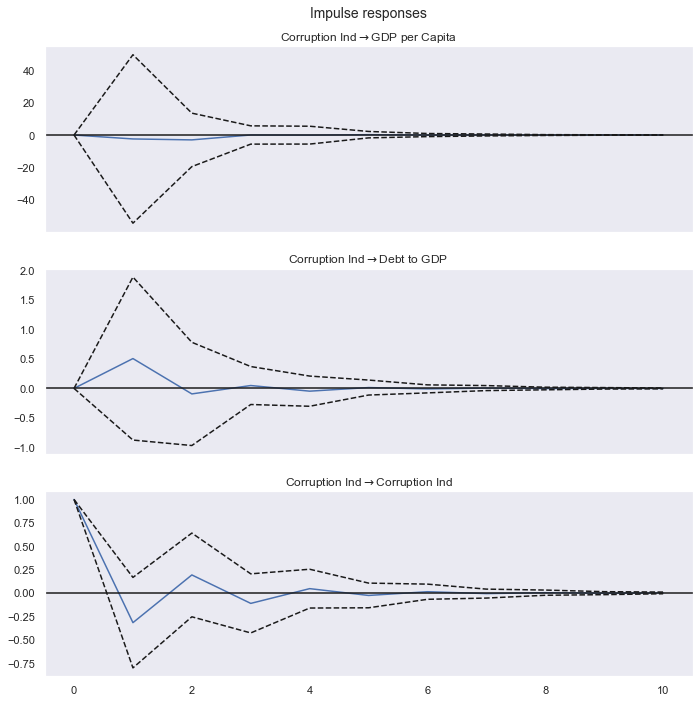

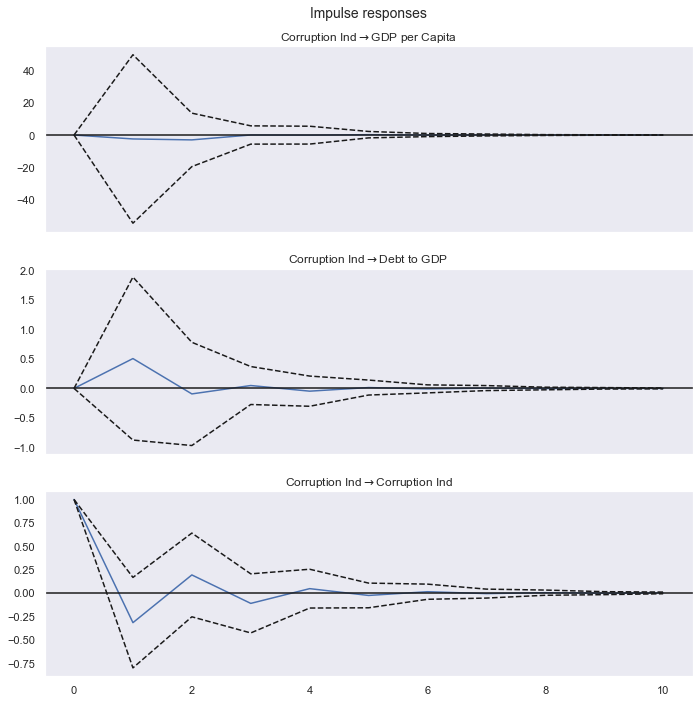

In [64]:
irf = results.irf(10)
irf.plot(impulse='Corruption Ind')

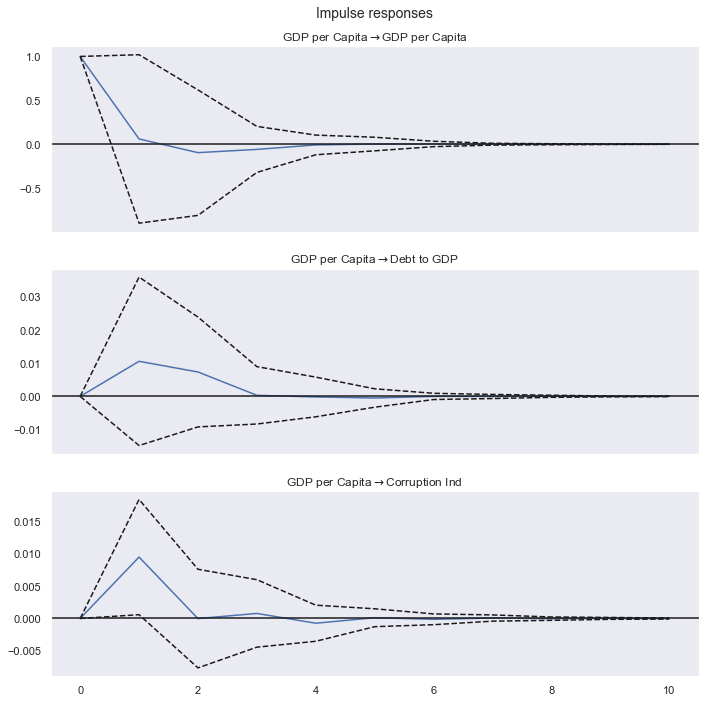

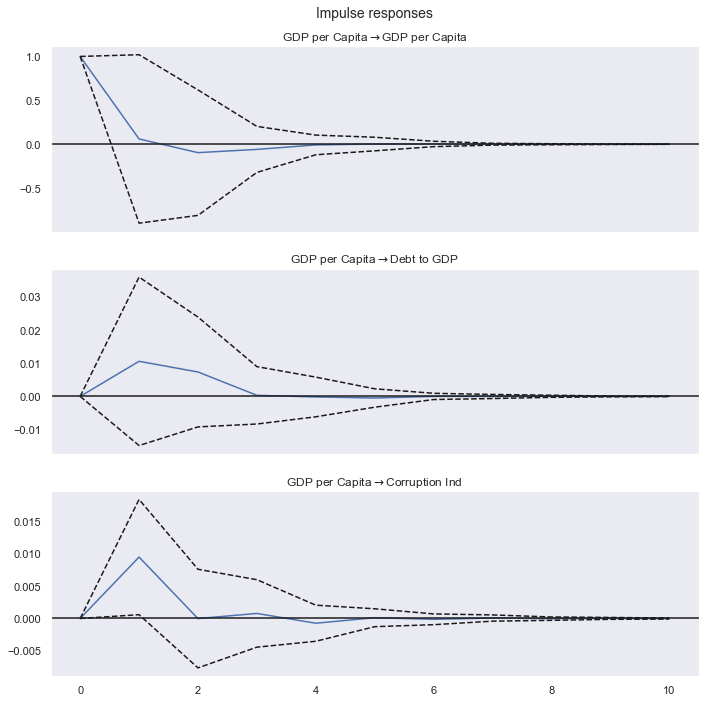

In [66]:
irf = results.irf(10)
irf.plot(impulse='GDP per Capita')